# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
# não esquecer de comentar essa linha antes de submeter o desafio
# por alguma razão, costuma dar erro quando não comentamos.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(athletes, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(athletes[col_name].dropna().index, size=n, replace=False)
    
    return athletes.loc[random_idx, col_name]



## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
from scipy import stats

athletes.head(10)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


In [6]:
print("----------Top-5- Record----------")
print(athletes.head(5))
print("-----------Information-----------")
print(athletes.info())
print("-----------Data Types-----------")
print(athletes.dtypes)
print("----------Missing value-----------")
print(athletes.isnull().sum())
print("----------Null value-----------")
print(athletes.isna().sum())
print("----------Shape of Data----------")
print(athletes.shape)

----------Top-5- Record----------
          id            name nationality     sex       dob  height  weight  \
0  736041664  A Jesus Garcia         ESP    male  10/17/69    1.72    64.0   
1  532037425      A Lam Shin         KOR  female   9/23/86    1.68    56.0   
2  435962603     Aaron Brown         CAN    male   5/27/92    1.98    79.0   
3  521041435      Aaron Cook         MDA    male    1/2/91    1.83    80.0   
4   33922579      Aaron Gate         NZL    male  11/26/90    1.81    71.0   

       sport  gold  silver  bronze  
0  athletics     0       0       0  
1    fencing     0       0       0  
2  athletics     0       0       1  
3  taekwondo     0       0       0  
4    cycling     0       0       0  
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   n

In [7]:
alpha = 0.05

In [8]:
altura = get_sample(athletes, "height", 3000)

In [9]:
peso = get_sample(athletes, "weight", 3000)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [10]:
def q1():
    shapiro_test = sct.shapiro(altura)
    return bool(shapiro_test[1] >= alpha)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

*Resposta: Não podemos dizer que são condizentes, pois a forma do gráfico representa uma distruibuição normal, já o teste apresentou o resultado false.*

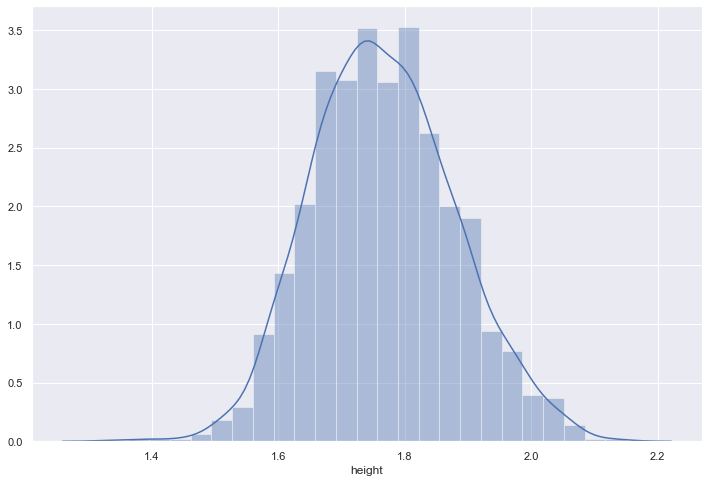

In [11]:
sns.distplot(altura, bins=25, hist_kws={"density": True})

* Plote o qq-plot para essa variável e a analise.

* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [12]:
def q2():
    jarque_bera = stats.jarque_bera(altura)
    return bool(jarque_bera[1] > alpha)

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [13]:
def q3():
    normal_test, p_value = stats.normaltest(peso)
    return bool(p_value >= alpha)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [14]:
def q4():
    peso_log = np.log(peso)
    normal_test, p_value = stats.normaltest(peso_log)
    return bool(p_value >= alpha)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [15]:
bra = athletes.query('nationality == "BRA"')
usa = athletes.query('nationality == "USA"')
can = athletes.query('nationality == "CAN"')

In [16]:
def q5():
    estatistic, p_value = sct.ttest_ind(bra.height, usa.height, equal_var = False, nan_policy = "omit")
    return np.bool(p_value >= alpha)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [17]:
def q6():
    estatistic, p_value = sct.ttest_ind(bra.height, can.height, equal_var = False, nan_policy = "omit")
    return np.bool(p_value >= alpha)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [18]:
def q7():
    estatistic, p_value = sct.ttest_ind(usa.height, can.height, equal_var = False, nan_policy = "omit")
    return np.float(np.round(p_value, 8))

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?